# Отчет по лабораторной работе №4
### Выполнил Гвоздков Егор

Рассмотрим задачу нахождения безусловного минимума функции $f({x})$, заданной на всем пространстве $R^2$: 

$$f({x})\to \textrm{min},{X}\in R^2$$

Для численного решения задачи обычно строят некоторую последовательность векторов $\{{x}^k\}|_{k=0}^\infty$, обрывая процесс построения тогда, когда появляется уверенность, что последний из построенных элементов последовательности близок к точке минимума. 

Я использовал следующее условие обрывания процесса:

$$||{x}^k-{x}^{k-1}||<\varepsilon$$

Процесс поиска минимума итерационный:

$${x}^{k+1}={x}^k+\alpha_k {p}^k,$$

где ${p}^k$ - вектор, определяющий направление движения от точки ${x}^{k}$ к точке ${x}^{k+1}$, $\alpha_{k}$ - числовой множитель, величина которого задает длину шага в направлении ${p}^k$. Для поиска альфа использовался метод скользущего окна из методички.

В методе сопряженных градиентов вектор ${p}^k$ зависит не только от градиента функции $f(x^k)$, но и от градиента в предыдущей точке $\nabla f(x^{k−1})$ (т.е. метод является двухшаговым), и строится по
правилу

$$
p^k=-\nabla f(x^{k}) +\beta_k p^{k-1}
$$

где

$$
\beta_0=0,\quad
\beta_k=\frac{(\nabla f(x^{k}),\nabla f(x^{k})-\nabla f(x^{k-1}))}{||\nabla f(x^{k-1})||^2}
$$

Предоставленная в задании функция не имеет экстремумов: http://goo.gl/Y1WV96

Поэтому используется функция чуть-чуть подправленная, у которой максимум есть: https://goo.gl/8opBTU

$$
f(x_1,x_2,x_3)=-2x_1^2+16x_1-x_2^2+2x_2-3x_3^4+24x_3^3-72x_3+96x_3-77
$$

Максимум  $f(4, 1, 6.05456)\approx 1396.66$

Так как численные алгоритмы все пишутся для поиска минимума, то функция взята с обратным знаком и ищется ее минимум (он же максимум исходной). В тексте описания программ говорится о поиске минимума, а в конце кода в ответе указано что найден максимум нужной нам функции.

Для расчета градиента, матрицы гессиана, проверки существования максимумов у функции использовался Вольфрам Альфа.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Векторная функция f(x) где x=[x1,x2,x3]
def f(x):
    return -(-2*x[0]**2+16*x[0]-x[1]**2+2*x[1]-3*x[2]**4+24*x[2]**3-72*x[2]+96*x[2]-77)

# Для построения contour графика векторная функция не подходит
def f_for_plot(x,y,z):
    return -(-2*x**2+16*x-y**2+2*y-3*z**4+24*z**3-72*z+96*z-77)

# https://www.wolframalpha.com/input/?i=gradient+-2*x[0]**2%2B16*x[0]-x[1]**2%2B2*x[1]-3*x[2]**4%2B24*x[2]**3-72*x[2]%2B96*x[2]-77
def grad(x):
    return -np.array([-4*(x[0] - 4), 2 - 2*x[1], -12*(x[2]**3 - 6*x[2]**2 - 2)])

# https://www.wolframalpha.com/input/?i=hessian+-2*x[0]**2%2B16*x[0]-x[1]**2%2B2*x[1]-3*x[2]**4%2B24*x[2]**3-72*x[2]%2B96*x[2]-77
def hessian(x):
    return np.array([[-4, 0, 0], [0, -2, 0], [0, 0, 144*x[2] - 36*x[2]**2]])

В методе сопряженных градиентов $\alpha_{k}$ выбирается как в методе наискорейшего спуска, из условия минимума функции $f(x)$ вдоль направления антиградиента:

$$f(x_k+\alpha_kp^k)=\min\limits_{\alpha>0} f(x_k+\alpha p^k)$$

То есть как и в методе наискорейшего спуска на каждом шаге нужно решать задачу поиска минимума функции одной переменной 

$$F^k(\alpha)=f(x_k+\alpha p^k)$$


### Поиск минимума на отрезке унимодальности

Функция $F^k(\alpha)$ может иметь много минимумов. Нам нужен только первый.Он берется на первом интервале унимодальности методом скользущего окна (из методички).

После определения унимодального интервала поиск минимума ведется методом золотого сечения.

### Метод скользущего окна

Для выбранной точки $\alpha_0=0$ и окна шириной $2h >0$ около точки $\alpha_0$ проверяется условие унимодальности 

$$F(\alpha_0−h)> F(\alpha_0)< F(\alpha_0+h).$$

Если условие выполнено, то считается, что интервал унимодальности найден, в противном случае проверяется 

$$F(\alpha_0−h)> F(\alpha_0+h).$$

Если последнее выполнено, тогда окно сдвигается вправо от точки $\alpha_0$ на $\frac{h}{2}$, иначе так же влево.

Ширина окна выбирается из интуиции исследователя, я подбирал минимально подходящее чтобы алгоритм начал работать.

In [3]:
# Принимает на вход функцию одной скалярной переменной
def scolz_okno(F):
    h=0.01
    a0=0
    while not ((F(a0-h)>F(a0))&(F(a0+h)>F(a0))):
        if F(a0+h)>F(a0):
            a0=a0-h/2
        else:
            a0=a0+h/2
    return a0

### Метод золотого сечения

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F

Пусть задана  $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$. Тогда для того, чтобы найти неопределённое значение этой функции на заданном отрезке, отвечающее критерию поиска (пусть это будет минимум), рассматриваемый отрезок делится в пропорции золотого сечения в обоих направлениях, то есть выбираются две точки $x_1$ и $x_2$ такие, что: 

$$\frac{b-a}{b-x_1}=\frac{b-a}{x_2-a}=\Phi=\frac{1+\sqrt{5}}{2}=1.618\ldots,$$ 

где $\Phi$ — пропорция золотого сечения.  Введем обозначение $t=\frac{(b-a)}{\Phi}$, тогда 

$$\begin{array}{ccc}
x_1=b-t\\
x_2=a+t
\end{array}$$

Точка $x_1$ делит отрезок $[a,\;x_2]$ в отношении золотого сечения. Аналогично $x_2$ делит отрезок $[x_1,\;b]$ в той же пропорции. Это свойство и используется для построения итеративного процесса:

**Итерационный процесс**
* На первой итерации заданный отрезок делится двумя симметричными относительно его центра точками и рассчитываются значения в этих точках
* После чего тот из концов отрезка, к которому среди двух вновь поставленных точек ближе оказалась та, значение в которой максимально (для случая поиска минимума), отбрасывают
* На следующей итерации в силу показанного выше свойства золотого сечения уже надо искать всего одну новую точку
* Процедура продолжается до тех пор, пока не будет достигнута заданная точность

In [4]:
phi = 0.5 * (1.0 + np.sqrt(5.0))
def zolot_sech(f,a,b): 
    eps=0.05
    if abs(b-a)<eps: 
        return (a+b)/2
    else:
        t=(b-a)/phi
        x1=b-t
        x2=a+t
        if f(x1)>=f(x2):
            return zolot_sech(f,x1,b)
        else:
            return zolot_sech(f,a,x2)

Я задал значения:

* $\varepsilon$ - условие остановки итерации $||x^n-x^{n-1}||<\varepsilon$,
* $p$ - начальный шаг. Он задается в цикле, поэтому сначала пустой
* аналогично $\beta$
* x - начальная точка
* x_old - предыдущая точка. До цикла, чтобы он запустился, взял ее заведомо далеко от x.
* dots - будет массив массивов текущих точек x1,x2,x3 в цикле
* i - кол-во итераций

In [5]:
epsilon = 0.0001 #Точность
p=np.zeros(3) 
beta=0 
x=np.array([3,-5,5]) # Начальная точка xk=x0
x_old=np.ones(3)*10**3 # Предыдущая точка
dots=[]
i=0

В цикле тождественно $x^k\equiv x$, $x^{k-1} \equiv x_{old}$. Аналогично и с другими переменными ($\beta^k$, $p^k$) Фактически, каждый виток цикла перезаписывает эти текущее и предыдущие значения, и в каждый момент времени программа помнит только текущий и предыдущий шаг. 

На каждом витке цикла находится новый вектор шага $p^k\equiv p$, и задача минимизации ищет нужную длину шага в направлении этого вектора.

Так как вектор $p$ важен только как направление, то он делится на свою норму в 5 строчке следующего кода (за счет этого будет вычислительно проще решаться последующая задача минимизации, если вдруг вычисленный $p$ окажется очень большим).


In [6]:
while np.linalg.norm(x-x_old)>epsilon:
#     print(i)
    i+=1
    p=(-grad(x)+beta*p)
    p=p/np.linalg.norm(p)

    def F(alpha):
        return f(x+alpha*p)

    alpha=zolot_sech(F,0,scolz_okno(F))

    x_old=x
    dots.append(x)
    x=x+alpha*p

    beta=np.dot(grad(x),grad(x)-grad(x-x_old))/np.linalg.norm(x_old)**2

Я получаю последнюю точку (точку максимума) покоординатно, а также задаю сетку для графика:

In [7]:
xmax,ymax,zmax=x
X,Y,Z=np.array(dots).T
xlist,ylist=np.meshgrid(np.arange(-7,7,0.1),np.arange(-7,7,0.1))

Строю графики линий уровня и на них же ломаные поиска максимума (все в сечениях точки максимума)

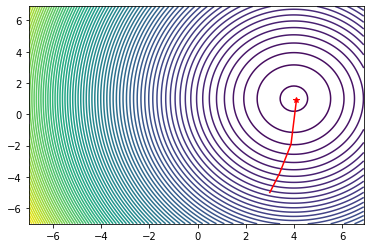

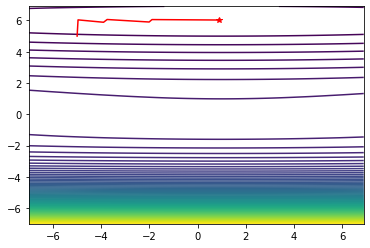

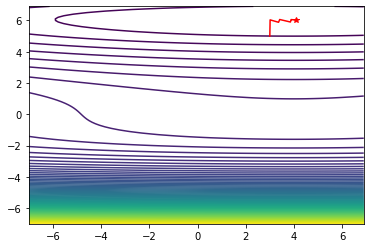

In [8]:
# plt.subplot(131)
# plt.contourf(xlist,ylist,f_for_plot(xlist,ylist,zmax),100)
plt.contour(xlist,ylist,f_for_plot(xlist,ylist,zmax),100)
plt.plot(X,Y,'-r')
plt.plot(xmax,ymax,'r*')
plt.show()
# plt.subplot(132)
# plt.contourf(xlist,ylist,f_for_plot(xmax,xlist,ylist),100)
plt.contour(xlist,ylist,f_for_plot(xmax,xlist,ylist),100)
plt.plot(Y,Z,'-r')
plt.plot(ymax,zmax,'r*')
plt.show()

# plt.subplot(133)
# plt.contourf(xlist,ylist,f_for_plot(xlist,ymax,ylist),100)
plt.contour(xlist,ylist,f_for_plot(xlist,ymax,ylist),100)
plt.plot(X,Z,'-r')
plt.plot(xmax,zmax,'r*')

plt.show()

Вывожу на экран результаты расчетов:

In [9]:
print('Итераций: ',i)
print(x,'- точка максимума функции')
print(-f(x),'- максимума функции')

Итераций:  12
[4.10308956 0.8994532  6.05141027] - точка максимума функции
1396.6250473696612 - максимума функции


По определению нахожу  показатель овражности в окрестности точки максимума, как модуль отношения наибольшего собственного числа матрицы Гессе $\nabla^2 f(x,y,z)$ в точке максимума к наименьшему.

In [10]:
sobstv=np.linalg.eig(hessian(x))[0] # Собственные значения матрицы Гессе
k=np.abs(np.max(sobstv)/np.min(sobstv)) # Коэфф. овражности
print('Коэффициент овражности k=',k)

Коэффициент овражности k= 0.00447526102859428
